#Atividade 
 
 
*   Entregar um documento COLAB do Google com um comparação dos resultados da classificação dos dados IRIS e WINE comparando LDA, QDA e NB, com comentários.

#### 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [1]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

#### 2. Importação de módulos específicos

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#### 3.   *Leitura do Dataset "Wine"*

      *   O dataset será retirado de um repositório pessoal do GITHUB


In [4]:
Wine = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Wine%20UCI.csv')
Wine = Wine.drop([178], axis = 0)   
Wine.replace({'Label' : { 1.0 : "Class 1", 2.0 : "Class 2", 3.0 : "Class 3" }}, inplace = True)
 
print(Wine)     #print do dataset para verificação

       Label  Alcohol  Malic Acid  ...   Hue  OD280/OD315 of diluted wines  Proline
0    Class 1    14.23        1.71  ...  1.04                          3.92   1065.0
1    Class 1    13.20        1.78  ...  1.05                          3.40   1050.0
2    Class 1    13.16        2.36  ...  1.03                          3.17   1185.0
3    Class 1    14.37        1.95  ...  0.86                          3.45   1480.0
4    Class 1    13.24        2.59  ...  1.04                          2.93    735.0
..       ...      ...         ...  ...   ...                           ...      ...
173  Class 3    13.71        5.65  ...  0.64                          1.74    740.0
174  Class 3    13.40        3.91  ...  0.70                          1.56    750.0
175  Class 3    13.27        4.28  ...  0.59                          1.56    835.0
176  Class 3    13.17        2.59  ...  0.60                          1.62    840.0
177  Class 3    14.13        4.10  ...  0.61                          1.60  

É importante ressaltar que a linha 178 contêm somente dados faltantes então a mesma será excluida do dataset.

#### 4.   *Leitura do Dataset "Iris"*

      *   O dataset será retirado de um repositório pessoal do GITHUB


In [5]:
Iris = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Iris.csv')
Iris = Iris.drop(["Id"], axis = 1)
 
print(Iris.head())    #print do dataset para verificação

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


#### 5.   Gráficos dos dados inalterados

    * Contabilização das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wine dataset')

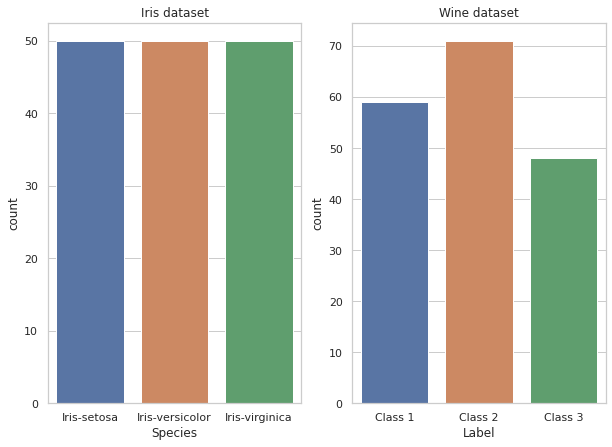

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,7))
sns.countplot(Iris['Species'], ax=ax[0]).set_title("Iris dataset")
sns.countplot(Wine['Label'], ax=ax[1]).set_title("Wine dataset")

Atravéz deste plot é possível perceber que o dataset IRIS possui classes balanceadas e o dataset WINE possui classes desbalanceadas.

    * Cálculo e plot da matriz de correlação

Text(0.5, 1.0, 'Matriz de correlação do Iris')

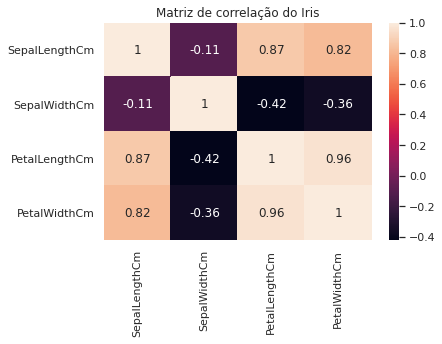

In [7]:
sns.heatmap(Iris.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Iris")

É interessante perceber que 3 das 4 variáveis possuem altos valores de correlação positiva e que "SepalWidthCm" acaba por ser a variável que mais transmite informação importante para o classificador devido ao seu baixo ou médio valor de correlação. Tambem percebe-se que esta variável possui correlação negativa com todas as outras variáveis.

Text(0.5, 1.0, 'Matriz de correlação do Wine')

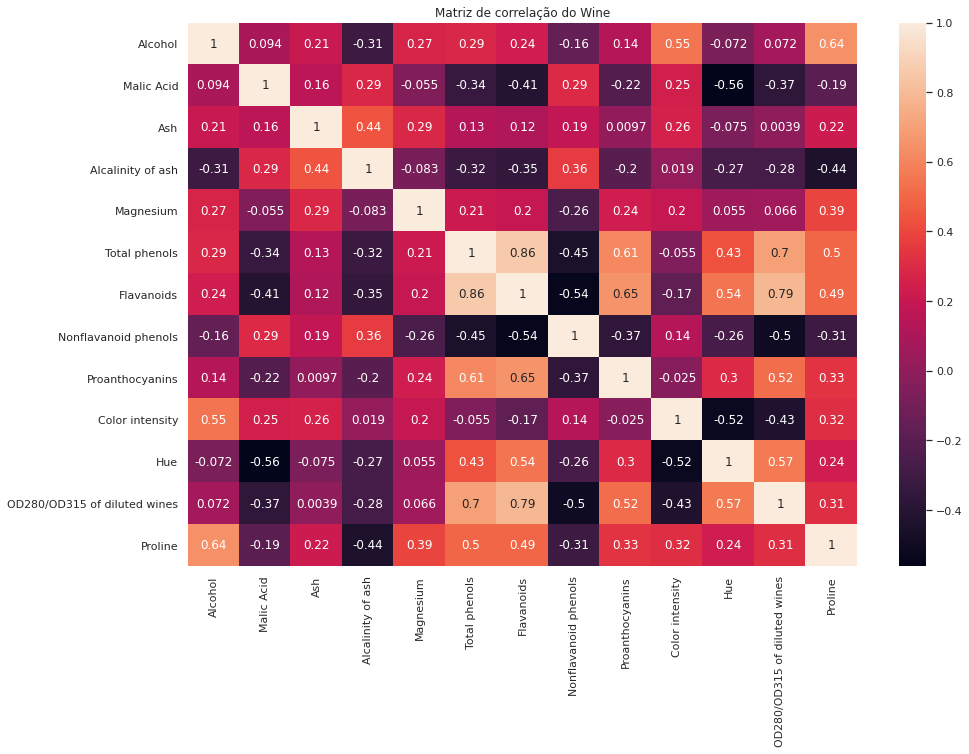

In [8]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(Wine.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Wine")

É possivel ver que alguns dados possuem grandes correlações positiva com outras variáveis ("Total phenols" e "Flavanoids" por exemplo), algumas negativas e alguns dados possuem correlação quase nula com outros.

    * Cálculo e plot da matriz de covariância

Text(0.5, 1.0, 'Matriz de covariância do Iris (sem alteração)')

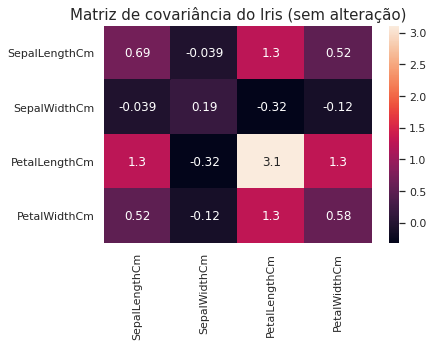

In [9]:
sns.heatmap(Iris.iloc[ : , :4].cov(), color = 'k', annot = True).set_title("Matriz de covariância do Iris (sem alteração)", fontsize = 15)

Text(0.5, 1.0, 'Matriz de covariância do Wine (sem alteração)')

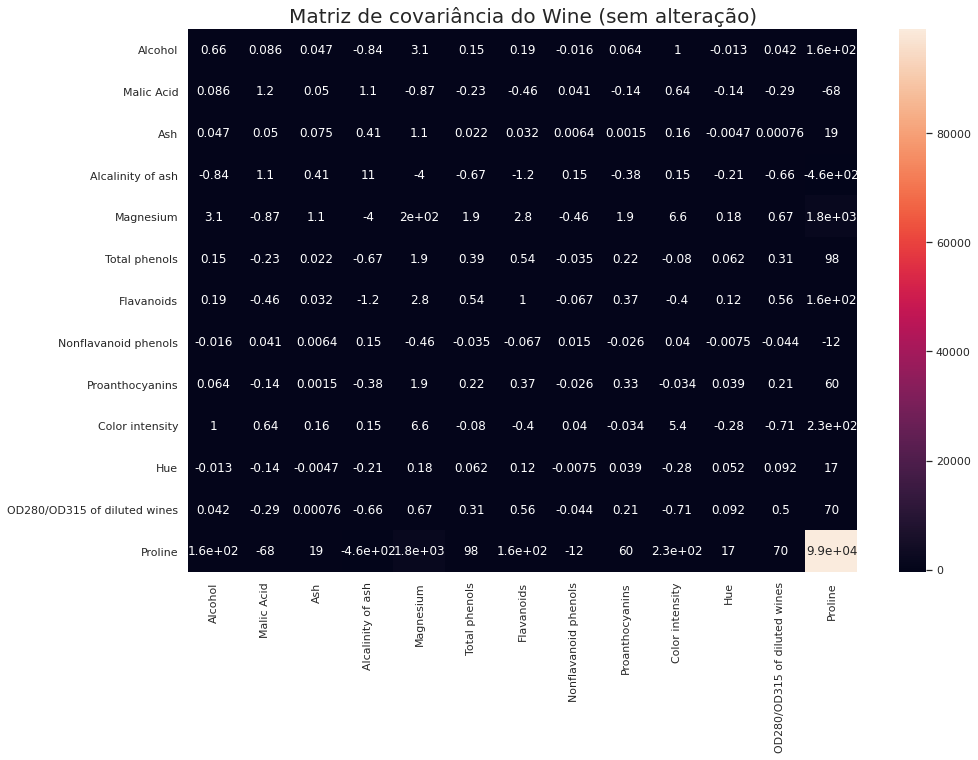

In [10]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(Wine.iloc[:, 1:].cov(), color = 'k', annot = True).set_title("Matriz de covariância do Wine (sem alteração)", fontsize=20)

    * Pairplot do dataset IRIS para melhor visualização das caracteristicas de correlação

<Figure size 7200x4800 with 0 Axes>

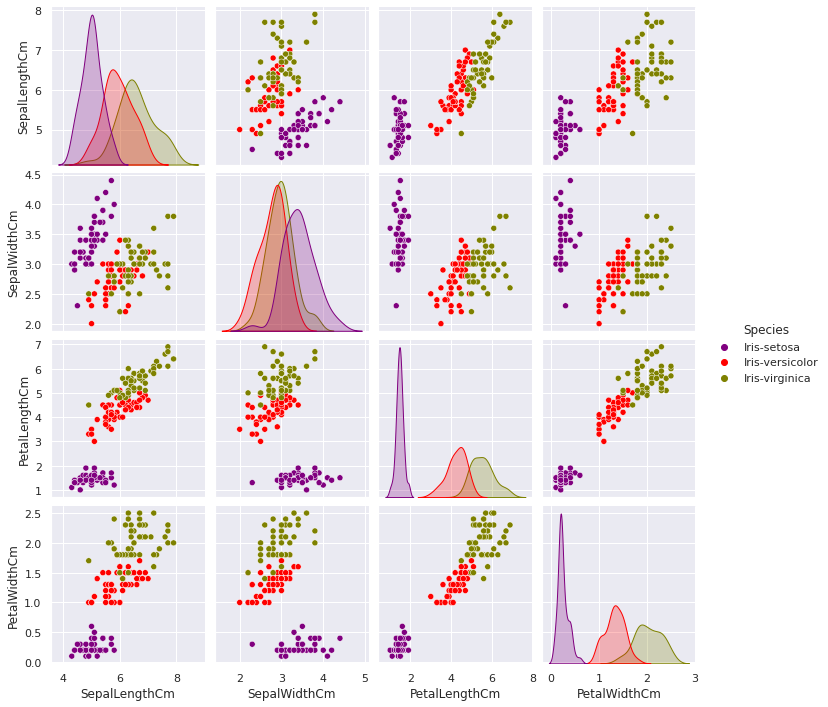

In [11]:
plt.figure(dpi = 1200)
sns.pairplot(Iris, hue = "Species", palette = "brg")

    * Pairplot do dataset WINE para melhor visualização das caracteristicas de correlação dos atributos

In [12]:
sns.set(font_scale = 1.05)
sns.pairplot(Wine, hue = "Label", palette = "brg")

Output hidden; open in https://colab.research.google.com to view.

#### 6. Separação dos dados

In [13]:
features_iris = Iris.iloc[:,:4].values
target_iris = Iris.iloc[:,4].values

In [14]:
features_wine = Wine.iloc[:,1:].values
target_wine = Wine.iloc[:,0].values

#### 7. LDA com os dados da IRIS

    * Será feito a classificação dos dados da iris utilizando o LDA

In [15]:
results_irisLDA = cross_validate(LDA(), features_iris, target_iris, cv = KFold(n_splits = 10, random_state = 0, shuffle = True), 
      scoring = ['accuracy', 'f1_macro', 'f1_micro'])

In [16]:
print(results_irisLDA)
print("\nMean Accuracy: {}\nMean F1 Macro: {}\nMean F1 Micro: {}"
      .format(results_irisLDA["test_accuracy"].mean(), results_irisLDA["test_f1_macro"].mean(), results_irisLDA["test_f1_micro"].mean()))

{'fit_time': array([0.0198133 , 0.00110078, 0.00095606, 0.00109553, 0.0012207 ,
       0.00118208, 0.00120544, 0.00106788, 0.00094676, 0.00093198]), 'score_time': array([0.00203848, 0.00162029, 0.00159431, 0.00189567, 0.00287104,
       0.00181007, 0.00391984, 0.00160384, 0.00153995, 0.00182199]), 'test_accuracy': array([1.        , 1.        , 0.93333333, 0.86666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93333333]), 'test_f1_macro': array([1.        , 1.        , 0.93265993, 0.86111111, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93265993]), 'test_f1_micro': array([1.        , 1.        , 0.93333333, 0.86666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93333333])}

Mean Accuracy: 0.9733333333333334
Mean F1 Macro: 0.9726430976430975
Mean F1 Micro: 0.9733333333333334


#### 8. LDA com os dados da WINE

    * Será feito a classificação dos dados da wine utilizando o LDA

In [17]:
results_wineLDA = cross_validate(LDA(), features_wine, target_wine, cv = KFold(n_splits = 10, random_state = 0, shuffle = True),
      scoring = ['accuracy', 'f1_macro', 'f1_micro'])

In [18]:
print(results_wineLDA)
print("\nMean Accuracy: {}\nMean F1 Macro: {}\nMean F1 Micro: {}"
      .format(results_wineLDA["test_accuracy"].mean(), results_wineLDA["test_f1_macro"].mean(), results_wineLDA["test_f1_micro"].mean()))

{'fit_time': array([0.00188518, 0.00149488, 0.00152445, 0.00141597, 0.00162292,
       0.00156307, 0.00169778, 0.00239682, 0.00162292, 0.00137234]), 'score_time': array([0.00205779, 0.00209284, 0.00167346, 0.00172806, 0.00195646,
       0.00260282, 0.00212049, 0.00192308, 0.00166368, 0.00194597]), 'test_accuracy': array([0.94444444, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.94444444, 1.        , 1.        , 1.        ]), 'test_f1_macro': array([0.94871795, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93265993, 1.        , 1.        , 1.        ]), 'test_f1_micro': array([0.94444444, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.94444444, 1.        , 1.        , 1.        ])}

Mean Accuracy: 0.9888888888888889
Mean F1 Macro: 0.9881377881377882
Mean F1 Micro: 0.9888888888888889


#### 9. QDA com os dados da IRIS

    * Será feito a classificação dos dados da iris utilizando o QDA

In [19]:
results_irisQDA = cross_validate(QDA(), features_iris, target_iris, cv = KFold(n_splits = 10, random_state = 0, shuffle = True),
      scoring = ['accuracy', 'f1_macro', 'f1_micro'])

In [20]:
print(results_irisQDA)
print("\nMean Accuracy: {}\nMean F1 Macro: {}\nMean F1 Micro: {}"
      .format(results_irisQDA["test_accuracy"].mean(), results_irisQDA["test_f1_macro"].mean(), results_irisQDA["test_f1_micro"].mean()))

{'fit_time': array([0.01986504, 0.0006671 , 0.00092983, 0.0049293 , 0.00057912,
       0.00082755, 0.00060654, 0.00064087, 0.00059843, 0.00060201]), 'score_time': array([0.00202608, 0.01031256, 0.00647545, 0.00183511, 0.00869703,
       0.00162363, 0.00775456, 0.00163078, 0.00714755, 0.00154686]), 'test_accuracy': array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 1.        , 1.        , 0.93333333]), 'test_f1_macro': array([1.        , 1.        , 0.93265993, 0.92822967, 1.        ,
       0.91111111, 1.        , 1.        , 1.        , 0.93265993]), 'test_f1_micro': array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 1.        , 1.        , 0.93333333])}

Mean Accuracy: 0.9733333333333334
Mean F1 Macro: 0.9704660641502747
Mean F1 Micro: 0.9733333333333334


#### 10. QDA com os dados da WINE

    * Será feito a classificação dos dados da wine utilizando o QDA

In [21]:
results_wineQDA = cross_validate(QDA(), features_wine, target_wine, cv = KFold(n_splits = 10, random_state = 0, shuffle = True),
      scoring = ['accuracy', 'f1_macro', 'f1_micro'])

In [22]:
print(results_wineQDA)
print("\nMean Accuracy: {}\nMean F1 Macro: {}\nMean F1 Micro: {}"
      .format(results_wineQDA["test_accuracy"].mean(), results_wineQDA["test_f1_macro"].mean(), results_wineQDA["test_f1_micro"].mean()))

{'fit_time': array([0.00494576, 0.00100756, 0.00112796, 0.00111103, 0.00100088,
       0.0009551 , 0.00095773, 0.00090337, 0.00090504, 0.00090289]), 'score_time': array([0.00200844, 0.00205469, 0.004076  , 0.00193548, 0.00173211,
       0.00168276, 0.00171041, 0.00165629, 0.00164342, 0.00165486]), 'test_accuracy': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94117647]), 'test_f1_macro': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94871795]), 'test_f1_micro': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94117647])}

Mean Accuracy: 0.9941176470588236
Mean F1 Macro: 0.9948717948717949
Mean F1 Micro: 0.9941176470588236


#### 11. GaussianNB com os dados da WINE

    * Será feito a classificação dos dados da wine utilizando o GaussianNB

In [23]:
results_irisGNB = cross_validate(GaussianNB(), features_iris, target_iris, cv = KFold(n_splits = 10, random_state = 0, shuffle = True),
      scoring = ['accuracy', 'f1_macro', 'f1_micro'])

In [24]:
print(results_irisGNB)
print("\nMean Accuracy: {}\nMean F1 Macro: {}\nMean F1 Micro: {}"
      .format(results_irisGNB["test_accuracy"].mean(), results_irisGNB["test_f1_macro"].mean(), results_irisGNB["test_f1_micro"].mean()))

{'fit_time': array([0.00091004, 0.00073576, 0.0060153 , 0.00393391, 0.00070977,
       0.00068212, 0.00068688, 0.00075483, 0.00067091, 0.00069237]), 'score_time': array([0.00513411, 0.00171065, 0.00179601, 0.0020237 , 0.00682831,
       0.00169086, 0.0079391 , 0.00167441, 0.00868273, 0.00166798]), 'test_accuracy': array([0.93333333, 1.        , 1.        , 0.8       , 0.93333333,
       1.        , 1.        , 1.        , 0.93333333, 0.93333333]), 'test_f1_macro': array([0.93277311, 1.        , 1.        , 0.79638009, 0.92673993,
       1.        , 1.        , 1.        , 0.93265993, 0.93265993]), 'test_f1_micro': array([0.93333333, 1.        , 1.        , 0.8       , 0.93333333,
       1.        , 1.        , 1.        , 0.93333333, 0.93333333])}

Mean Accuracy: 0.9533333333333334
Mean F1 Macro: 0.9521212991801227
Mean F1 Micro: 0.9533333333333334


#### 12. GaussianNB com os dados da WINE

    * Será feito a classificação dos dados da wine utilizando o GaussianNB

In [25]:
results_wineGNB = cross_validate(QDA(), features_wine, target_wine, cv = KFold(n_splits = 10, random_state = 0, shuffle = True),
      scoring = ['accuracy', 'f1_macro', 'f1_micro'])

In [26]:
print(results_wineGNB)
print("\nMean Accuracy: {}\nMean F1 Macro: {}\nMean F1 Micro: {}"
      .format(results_wineGNB["test_accuracy"].mean(), results_wineGNB["test_f1_macro"].mean(), results_wineGNB["test_f1_micro"].mean()))

{'fit_time': array([0.00589514, 0.0010066 , 0.00722718, 0.00095224, 0.00110221,
       0.00240231, 0.00093794, 0.000844  , 0.00087118, 0.00088882]), 'score_time': array([0.00240207, 0.00166631, 0.00226021, 0.00888252, 0.00176454,
       0.00182772, 0.00166297, 0.00171947, 0.00165057, 0.00256705]), 'test_accuracy': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94117647]), 'test_f1_macro': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94871795]), 'test_f1_micro': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94117647])}

Mean Accuracy: 0.9941176470588236
Mean F1 Macro: 0.9948717948717949
Mean F1 Micro: 0.9941176470588236
